# Project: Investigate a Dataset (NoshowAppointment Data)

## Table of Contents
- [Introduction to the Dataset](#introduction-to-the-dataset)
- [Research Questions](#research-questions)
- [Data Wrangling](#data-wrangling)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Conclusions](#conclusions)
- [Limitations](#limitations)

## Introduction to the Dataset 

The Dataset consists of the data related to the medical appointment details of 110,527 persons in Brazil. The data is focused on showing if the patients that booked appointment dates actually showed up for their appointments. The dataset is broken down into 14 associated variables (characteristics) and the variables would be further explained 

The original dataset can be found [here](https://www.kaggle.com/datasets/joniarroba/noshowappointments?select=KaggleV2-May-2016.csv)

### Description of column variables

01 - PatientId

This column defines the unique ID for identification of a patient

02 - AppointmentID

This column defines the unique ID for identification of each appointment.

03 - Gender

This refers to their gender, either Male or Female . Female is the greater proportion as it can be said that women takes better care of their health compared to the men.

04 - ScheduledDay

The day of the actual appointment, when they have to visit the doctor.

05 - AppointmentDay

The day someone called or registered the appointment, this is before appointment of course.

06 - Age

How old is the patient.

07 - Neighbourhood

This is where the appointment takes place.

08 - Scholarship

This states if the patient has a scholarship. Scholarship here describes a social welfare program offered by the Government of Brazil to provide financial aid to poor Brazilian families on the condition that the families ensure their children attend schools and get vaccinated. '1'  means such a patient has the scholarship  while '0' means the patient doesnt have the scholarship. See [here](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) for more details.

09 - Hipertension

Refers to a patient diagnosed with hypertension. '1' means yes while '0' means no.

10 - Diabetes

Refers to a patient diagnosed with Diabetes. '1' means yes while '0' means no.

11 - Alcoholism

Refers to a patient found to be an alcoholic. '1' shows that patient is an alcoholic while '0' shows that patient is not an alcoholic.

12 - Handcap

Is the patient handicapped?. this column has values 0-4. 

13 - SMS_received

This means either 1 or more messages were sent to the patient concerning the appointment. '1' means one sms was sent. '0' means sms was not sent.

14 - No-show

This is the most important aspect of the dataset and it shows if the patients showed up for their appointment or not. 'No' signifies that the patient showed up for the appointment while 'Yes' signifies that the patient didnt show up for their appointment.

## Research Questions

The following questions would form the basis for our EDA.


1. What gender books more medical appointments
2. Does awaiting time interval have any effect on patients showing up for appointments.
3. What factors are important for us to know if patients will show up for their appointments
4. Is there a relationship between age and having a scholarship?

In [1]:
# Import all the libraries to be used for investigating the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
%matplotlib inline

## Data Wrangling

In [2]:
# Load the dataset and explore its contents for better understanding
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.shape

(110527, 14)

In [5]:
df['PatientId'].nunique()

62299

In [6]:
df['AppointmentID'].nunique()

110527

From the data shown above, there are 110,527 observations and 14 column features.

it can be seen that there are no missing values in any of the columns
as all the columns contains complete set of values.

To properly clean-up this data to be more useful for our analysis, we would 

1. remove columns not needed such as patientId and AppointmentId.

2. Also we can change the column name of 'No-show' and its column values to a more relatable column name.

3. Lastly, we change the ScheduledDate and AppointmentDay to a datetime datatype.

4. Optionally, we can change the column values for Scholarship, Hipertension, Diabetes,Alcoholism, Handcap, and SMS_received to boolean values as it can reflect a boolean datatype. 


### Data Cleaning

In [7]:
# Data Cleaning - remove unwanted columns not needed for our analysis. 
# PatientId and Appointment Id would not be necessary for our analysis and thus would be removed

df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [8]:
# data cleaning - change the column name of 'No-show' and its column values to a more relatable column name.

df = df.rename(columns={'No-show':'met_appointment'})
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,met_appointment
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# Find the unique values in each of the columns 'Gender',Scholarship','Hipertension','Alcoholism','Handcap','SMS_received','met_appointment'
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [10]:
#Change row labels for the "met_appointment" column to better aid understanding and readability, i.e change yes to False, and no to True.

df['met_appointment'] = df['met_appointment'].str.replace("No","True").str.replace("Yes","False")
df['met_appointment'].head(20)

0      True
1      True
2      True
3      True
4      True
5      True
6     False
7     False
8      True
9      True
10     True
11    False
12     True
13     True
14     True
15     True
16     True
17    False
18     True
19     True
Name: met_appointment, dtype: object

In [11]:
# Define a function to count the unique values for each column
def countx(i) :
    print(i.value_counts());
    
countx(df['Neighbourhood'])

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64


In [12]:
countx(df['met_appointment'])

True     88208
False    22319
Name: met_appointment, dtype: int64


In [13]:
#  Correct case and typo errors of these columns to better reflect their observations - 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism','Handcap' 


# Change all column names to lowercase and correct spellings

df = df.rename(columns=lambda x: x.lower())
df.rename(columns={'hipertension':'hypertension','scheduledday':'scheduled_day','appointmentday':'appointment_day', 'handcap':'handicap'}, inplace=True)
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,met_appointment
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,True
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,True
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,True
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,True
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,True


In [14]:
# Convert the dtypes of the appointment and schedule days to datetime datatypes

df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   gender           110527 non-null  object             
 1   scheduled_day    110527 non-null  datetime64[ns, UTC]
 2   appointment_day  110527 non-null  datetime64[ns, UTC]
 3   age              110527 non-null  int64              
 4   neighbourhood    110527 non-null  object             
 5   scholarship      110527 non-null  int64              
 6   hypertension     110527 non-null  int64              
 7   diabetes         110527 non-null  int64              
 8   alcoholism       110527 non-null  int64              
 9   handicap         110527 non-null  int64              
 10  sms_received     110527 non-null  int64              
 11  met_appointment  110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usag

In [15]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,met_appointment
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,True
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,True
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,True
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,True
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,True


In [16]:

# # Change dtypes of the scholarship, hypertension, diabetes, alcoholism and handicap to boolean to reflect the values within its columns
# df[['scholarship','hypertension','diabetes','alcoholism']] = df[['scholarship','hypertension','diabetes','alcoholism']].astype('bool')
# df.info()

In [17]:
df.head(20)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,met_appointment
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,True
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,True
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,True
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,True
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,True
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,True
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,False
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,False
8,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,True
9,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,True


In [18]:
# Lets create an age group range by group patients into different categories of age-group.
# For this, we will create a summary statistics using the describe function.
df['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [19]:
df['age'].mean()

37.08887421173107

In [20]:
df['age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

In [21]:
# Change the -1 entry to the mean
df['age'].replace({-1: 37}, inplace=True)

It can be observed that one of the patient's age was documented as -1 and 3539 patients are 0 years old. Since only one person had an erroneous age of -1, we decided to change that value and replace with the mean age of 37. 


## Exploratory Data Analysis


1. What gender books more medical appointments
2. Does awaiting time interval have any effect on patients showing up for appointments.
3. What factors are important for us to know if patients will show up for their appointments
4. Is there a relationship between age and having a scholarship?

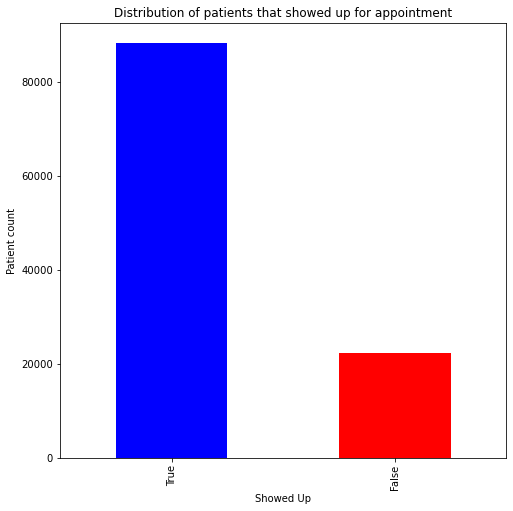

In [22]:
# Before diving into answering these questions, lets see the visual distribution of those that came for their appointment.
colors =['blue','red']
df['met_appointment'].value_counts().plot(kind='bar', figsize=(8,8),color=colors, xlabel='Showed Up', ylabel='Patient count', title='Distribution of patients that showed up for appointment');

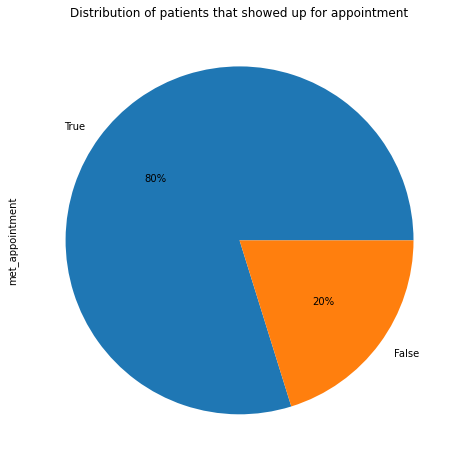

In [23]:
# let also create a pie chart to show the distribution of patients that showed up for their appointments
ind = df['met_appointment'].value_counts().index
df['met_appointment'].value_counts()[ind].plot(kind='pie', figsize=(8,8), autopct='%1.0f%%',title='Distribution of patients that showed up for appointment');

In [24]:
df['met_appointment'].value_counts()

True     88208
False    22319
Name: met_appointment, dtype: int64

Out of 110527 patients that scheduled appointments, 88208 showed up corresponding to 80% while 22319 did not show up corresponding to 20% of total patients.


#### 1. What gender books more medical appointments

In [77]:
df.groupby('gender').count()

,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,met_appointment,time_duration_days,apt_day_of_week
gender,,,,,,,,,,,,,
F,71840,71840,71840,71840,71840,71840,71840,71840,71840,71840,71840,71840,71840
M,38687,38687,38687,38687,38687,38687,38687,38687,38687,38687,38687,38687,38687


In [79]:
df['gender'].value_counts()

F    71840
M    38687
Name: gender, dtype: int64

More female patients schedules medical appointments as compared to their male counterparts as can be seen.

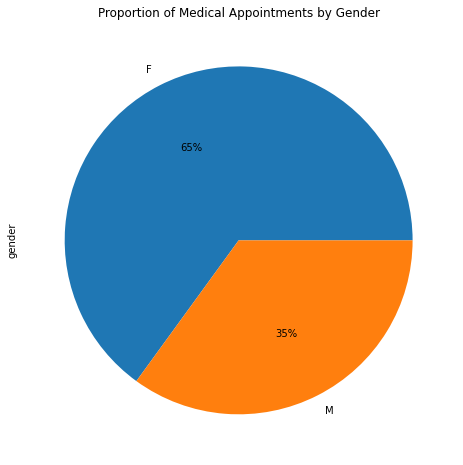

In [68]:
df['gender'].value_counts().plot(kind='pie', title='Proportion of Medical Appointments by Gender', figsize=(8,8), autopct='%1.0f%%');

#### 2. Does awaiting time-interval  have any effect on patients showing up for appointments.

We can get the time difference between when the time appointment was scheduled and the appointment date.
To know if the dates as stipulated had an effect on the patients showing up for appointment, we will need to know
the number of days between when the appointment was scheduled and the appointment day. This we create a new column to show the time difference in days.

In [28]:
df['time_duration_days'] = abs(df['appointment_day'].dt.date - df['scheduled_day'].dt.date)
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,met_appointment,time_duration_days
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,True,0 days
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,True,0 days
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,True,0 days
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,True,0 days
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,True,0 days


In [29]:
#Taking a careful look at the summary statistics of this new time duration variable

df['time_duration_days'].describe()

count                        110527
mean     10 days 04:24:47.462791897
std      15 days 06:07:01.236696805
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 4 days 00:00:00
75%                15 days 00:00:00
max               179 days 00:00:00
Name: time_duration_days, dtype: object

In [30]:
# Create a new column for day of the week
df['apt_day_of_week'] = df.appointment_day.dt.day_name()
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,met_appointment,time_duration_days,apt_day_of_week
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,True,0 days,Friday
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,True,0 days,Friday
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,True,0 days,Friday
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,True,0 days,Friday
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,True,0 days,Friday


In [31]:
# Change time duration to from datetime to integer

df['time_duration_days'] = df['time_duration_days'].dt.days
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   gender              110527 non-null  object             
 1   scheduled_day       110527 non-null  datetime64[ns, UTC]
 2   appointment_day     110527 non-null  datetime64[ns, UTC]
 3   age                 110527 non-null  int64              
 4   neighbourhood       110527 non-null  object             
 5   scholarship         110527 non-null  int64              
 6   hypertension        110527 non-null  int64              
 7   diabetes            110527 non-null  int64              
 8   alcoholism          110527 non-null  int64              
 9   handicap            110527 non-null  int64              
 10  sms_received        110527 non-null  int64              
 11  met_appointment     110527 non-null  object             
 12  time_duration_da

In [32]:
df.head()
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,time_duration_days
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.089218,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183883
std,23.109921,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


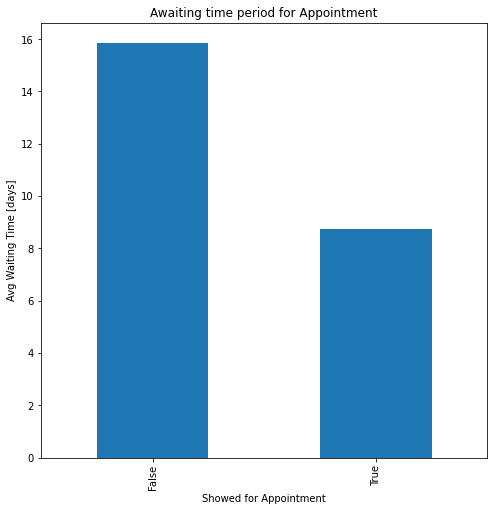

In [88]:
# Create a bar chart showing the average time taken by patients that either make their appointments or not.
df.groupby('met_appointment')['time_duration_days'].mean().sort_values(ascending=False).plot(kind='bar',xlabel='Showed for Appointment',ylabel='Avg Waiting Time [days]',title='Awaiting time period for Appointment',figsize=(8,8));

From the bar chart above, we can see clearly that on average, more persons do not show up for their medical appointment with even more time duration betweeen their scheduled day and their appointment day. Thus the time interval between scheduled day and their appointment day isn't a big factor that affect patients showing up for their appointment. 

#### 3. What factors are important for us to know if patients will show up for their appointments

In [35]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,met_appointment,time_duration_days,apt_day_of_week
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,True,0,Friday
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,True,0,Friday
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,True,0,Friday
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,True,0,Friday
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,True,0,Friday


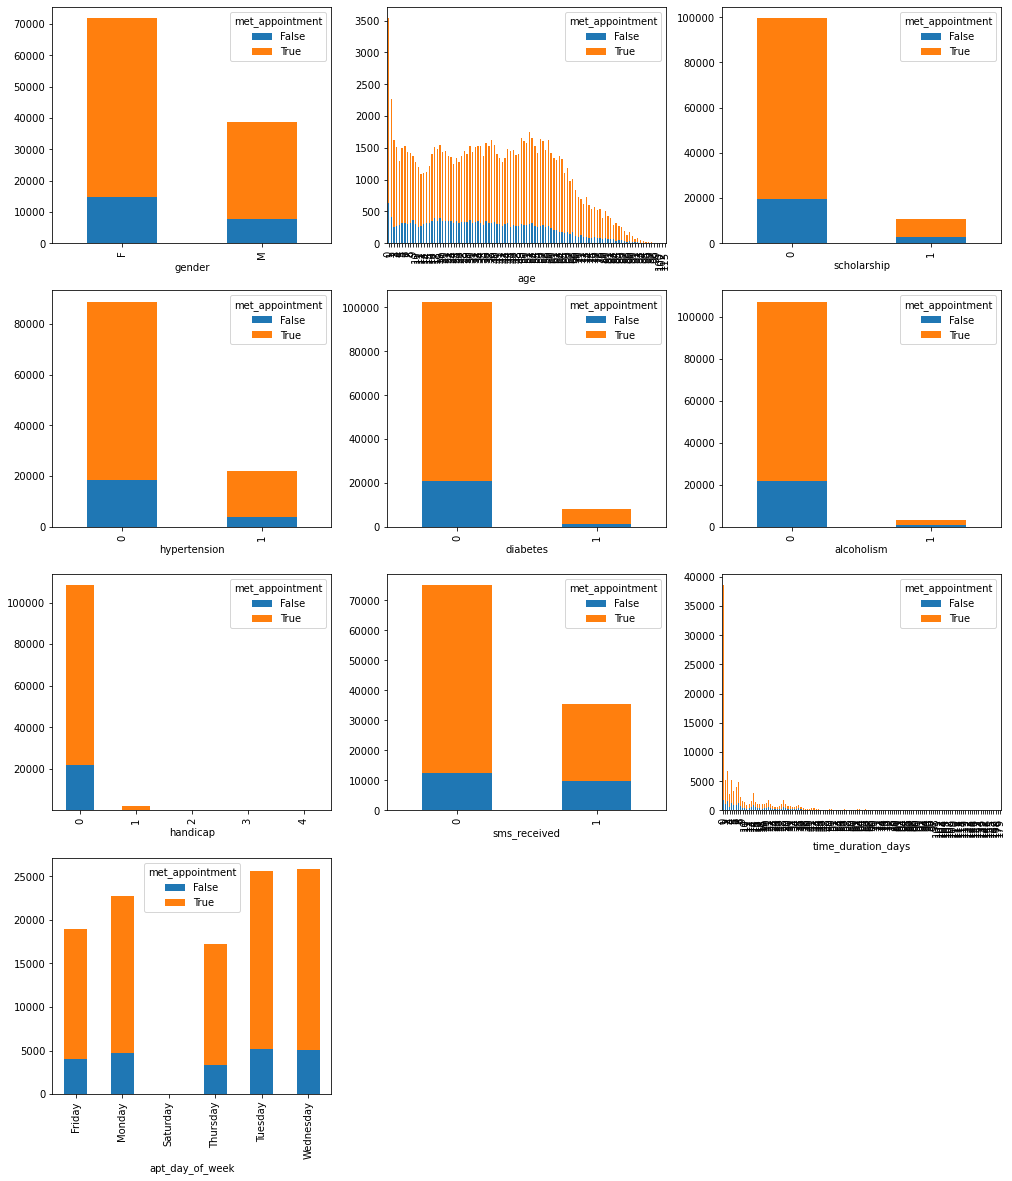

In [50]:
# Lets check the different variables and use them to answer our research question. 
# These variables to be considered are mainly numerical and categorical variables as portrayed below:

variables = ['gender', 'age', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received','time_duration_days', 'apt_day_of_week']

fig = plt.figure(figsize=(17, 20))
for i, var in enumerate(variables):
    ax = fig.add_subplot(4, 3, i+1)
    df.groupby([var, 'met_appointment'])[var].count().unstack('met_appointment').plot(ax=ax, kind='bar', stacked=True)

In [37]:
df.value_counts()

gender  scheduled_day              appointment_day            age  neighbourhood   scholarship  hypertension  diabetes  alcoholism  handicap  sms_received  met_appointment  time_duration_days  apt_day_of_week
F       2016-04-28 11:06:57+00:00  2016-05-06 00:00:00+00:00  55   CARATOÍRA       0            1             0         0           0         0             True             8                   Friday             7
M       2016-04-27 09:35:44+00:00  2016-06-01 00:00:00+00:00  86   ROMÃO           0            1             0         0           0         0             False            35                  Wednesday          5
F       2016-05-20 15:44:00+00:00  2016-05-20 00:00:00+00:00  14   JARDIM CAMBURI  0            0             0         0           0         0             True             0                   Friday             3
        2016-04-25 08:02:18+00:00  2016-05-09 00:00:00+00:00  37   JOANA D´ARC     0            0             0         0           0         0      

 In the previous question, we went deeper to look at the effect of awaiting time interval on showing up for appointments.
 
For these other features, we can clearly see that they all possess the same rate of distribution in regards to patients showing up for appointment. The percentage difference are same for all the features and show a higher percentage of patients showing up for appointments in the different categories analysed. Further analysis would be required on each of these features to make any further inferences.

#### 4. Is there a relationship between age and having a scholarship?

In [38]:
# Comparison of age and scholarship using their summary statistics. 
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,time_duration_days
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.089218,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183883
std,23.109921,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


This statistics isnt enough to see any trend or relationship. Let plot a bar chart to show relationship.

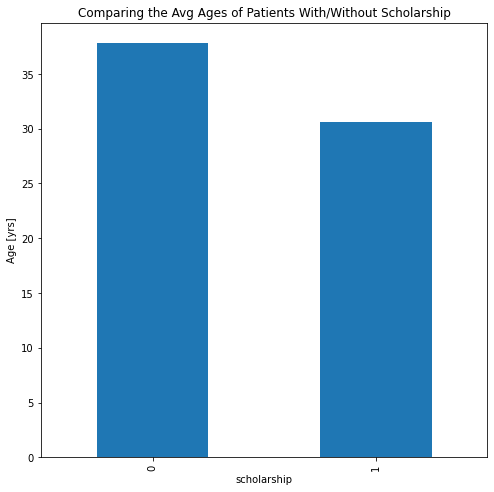

In [62]:
# Lets use the mean age to compare with the scholarship data
group = df.groupby('scholarship').mean()['age']

group.plot(kind='bar', title='Comparing the Avg Ages of Patients With/Without Scholarship', ylabel='Age [yrs]', figsize=(8,8));


In [40]:
p_corr = df['age'].corr(df['scholarship'])

p_corr

-0.09246320047708491

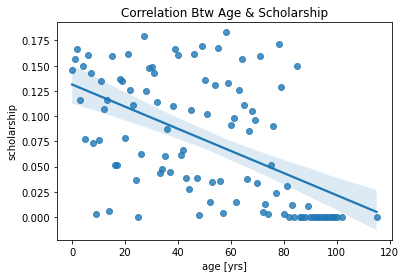

In [54]:
mean_scholarship = df['scholarship'].groupby(df['age']).mean()
age = df['age'].unique()
sns.regplot(x = age , y = mean_scholarship)
plt.xlabel('age [yrs]')
plt.title('Correlation Btw Age & Scholarship')
plt.show()

From the above and the chart below, we can see that a negative correlation exists. Although our data is still insufficient to demonstrate correlation, its enough to know that age doesnt have an effect on receiving a scholarship.

## Conclusions

The data of medical appointment show or noshow was used to answer a number of questions.

We were able to explore the data set to understand all its features and we went further to wrangle and clean up the data in line with what we intended to explore with the data.

A number of research questions were considered in our analysis and my observations are thus:

1. For the first research question, it obvious that more females booked for appointment compared to their male counterparts. 
   This could be for a couple of obvious reasons which were not stated by the data. Although, Ccomparing the gender information to the ailments in the data may be able to help us give more insights on why the result was the way it was.
   
2. In answering this question, i noticed a lot of awaiting days fell within the 0 days range. this was a major limitation to our analysis as that figure is relatively huge and substantial to our analysis - about 25%. I decided to work with this figure on the assumption that these sets of patients booked their appointment schedule same day as their appointment. Although, that assumption can only be accurate on the condition that all of the patients in this category showed up for their appointments. This of course is subject to more analysis which wasn't carried out in this study.

3. From our analysis, there was no distinct feature that was noticed to have had an effect on patients showing up for their appointments. More analysis would be needed on each of the features to get more insight sufficient to answer that question. 

4. For the fourth research question, no relationship was found in the age of patients been attributed to them getting a scholarship. More data would be required to investigate that. Data such as when the scholarship was obtained by the patients, and the ages of persons as at when they obtained their scholarship.

## Limitations

Whilst we were able to answer about four questions with the data set, some challenges and limitations were nevertheless encountered during the course of our analysis. 

A major limitation of our analysis was insufficient numerical data amongst the column features to enable us make more numerical analysis. These was the initial problem i encountered but along the course of our analysis, we were able to wrangle the data set enough to make the kind of analysis that answered our research questions.

Also the data cleaning process took a bulk of the time as compared to the exploratory data analysis. I didnt start the project on time and couldnt make out more time as i would have wanted to dive deeper into further answering the questions in the manner i would have wanted.

Also, certain assumptions had to be made for our analysis to proceed as i observed that a lot of patients were of age 0. The data didnt provide any extra information on why a patient would be age of 0 and i had to assume that these categories of patients were babies less that 6 months old so those values could be utilised for our analysis as the zero aged patients formed a huge percentage of patient's ages - about 3539.

Lastly i was also limited by my current knowledge level on python, as i had to read along on more efficient ways to carry out the data wrangling. I still need TO garner more indepth knowledge on diverse ways on how to plot visuals using pandas, matplotlib and seaborn. Hopefully my next project would be of much better quality.